In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
file_path = "/Users/alexanderprinz/Downloads/financials.feather"
findata = pd.read_feather(file_path)
print(findata.info())
print(findata.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438957 entries, 0 to 2438956
Columns: 135 entries, index to bvd_table
dtypes: float64(87), int64(1), object(47)
memory usage: 2.5+ GB
None
    index          idnr currency nat_prim_code nace_prim_code naics_core_code  \
0       0  AT9130090333      EUR        P85320           8532            6111   
1       1  AT9010000033      EUR        L68209           6820            5311   
2       2  AT9010000033      EUR        L68209           6820            5311   
3       3  AT9010000033      EUR        L68209           6820            5311   
4       4  AT9010000033      EUR        L68209           6820            5311   
5       5  AT9010000033      EUR        L68209           6820            5311   
6       6  AT9010000033      EUR        L68209           6820            5311   
7       7  AT9010000033      EUR        L68209           6820            5311   
8       8  AT9010000033      EUR        L68209           6820            5311   


Performance Score

Total_Score = Product(Sub_Scores)**0.2
Sub_Scores = Sum(weighted Percentile Ranks)
             - Percentile Rank grouped by Country (cntrycde) Sector (nat_prim_code) and Year (closdate_year)
             - Missing values = 0.5
             - Weighted according to the dict below

a) profitability
Return on shareholders funds (%) (RSHF) hib 0.5
Return on capital employed (%) (RCEM) hib 0.25
Return on total assets (%) (RTAS) hib 0.25

b) margins
Profit margin (%) (PRMA) hib 1/6
Gross Margin (%) (GRMA) hib 1/6
EBITDA Margin (%) (ETMA) hib 1/6
EBIT Margin (%) (EBMA) hib 1/6
Cash flow/Turnover (%) (CFOP) hib 1/3

c) balance sheet health
Liquidity ratio (x) (LIQR) hib 1/6
Shareholders liquidity ratio (x) (SHLQ) hib 1/6
Solvency ratio (%) (SOLR) hib 1/6
Gearing (%) (GEAR)lib 1/6
Interest cover (x) (IC) hib 1/3

d) working capital efficiency
Stock turnover (x) (STOT) hib 1/3
Collection period (days) (COLL) lib 1/3
Credit period (days) (CRPE) hib 1/3

e) labor productivity
Profit per employee (PPE) hib 1/3
Operat. rev. per employee (TPE) hib 1/3
Aver. cost of empl./year (ACE) lib 1/3



Reduced_Score: same logic but only with 
Liquidity ratio (x) (LIQR) hib 1/3
Shareholders liquidity ratio (x) (SHLQ) hib 1/3
Solvency ratio (%) (SOLR) hib 1/3
as these are the indicators with the most data. also they should be indicative of financial distress.

In [115]:
score_weights = {
    "performance_score_a": {"rshf": 1/2, "rcem": 1/4, "rtas": 1/4},
    "performance_score_b": {"prma": 1/6, "grma": 1/6, "etma": 1/6, "ebma": 1/6, "cfop": 1/3},
    "performance_score_c": {"liqr": 1/6, "shlq": 1/6, "solr": 1/6, "gear": 1/6, "ic": 1/3},
    "performance_score_d": {"stot": 1/3, "coll": 1/3, "crpe": 1/3},
    "performance_score_e": {"ppe": 1/3, "tpe": 1/3, "ace": 1/3},
}

score_orientation = ["solr", "gear", "coll"]

performance_score_a = ["rshf", "rcem", "rtas"]
performance_score_b = ["prma", "grma", "etma", "ebma", "cfop"]
performance_score_c = ["liqr", "shlq", "solr", "gear", "ic"]
performance_score_d = ["stot", "coll", "crpe"]
performance_score_e = ["ppe",  "tpe",  "ace"]

performance_weight_a = [1/2, 1/4, 1/4]
performance_weight_b = [1/6, 1/6, 1/6, 1/6, 1/3]
performance_weight_c = [1/6, 1/6, 1/6, 1/6, 1/3]
performance_weight_d = [1/3, 1/3, 1/3]
performance_weight_e = [1/3, 1/3, 1/3]


all_sub_scores = (
    performance_score_a +
    performance_score_b +
    performance_score_c +
    performance_score_d +
    performance_score_e
)
all_weights = (
    performance_weight_a +
    performance_weight_b +
    performance_weight_c +
    performance_weight_d +
    performance_weight_e
)
reduced_score = ["liqr", "shlq", "solr"]
reduced_weight = [1/3, 1/3, 1/3]

In [116]:
findata[score_orientation] = -1 * findata[score_orientation]

In [117]:
findata[all_sub_scores].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
rshf,314078.0,23.964551,91.327621,-998.28,3.78,14.68,33.26,999.91
rcem,309048.0,13.982361,50.715603,-994.40,3.14,9.80,20.41,996.54
rtas,330598.0,6.933014,14.813120,-100.00,1.13,5.36,12.21,100.00
prma,201741.0,4.413909,14.171638,-100.00,0.56,3.29,8.07,100.00
grma,13222.0,45.722033,31.717354,-99.71,20.62,36.73,70.98,100.00
etma,199641.0,8.621745,15.002078,-99.96,2.75,6.75,13.07,100.00
ebma,204574.0,4.286373,14.162493,-100.00,0.76,3.56,8.27,100.00
cfop,180721.0,7.515126,13.472768,-99.92,2.27,5.61,10.95,100.00
liqr,1005621.0,4.373981,9.522826,0.00,0.81,1.63,3.72,100.00
shlq,1512713.0,4.392710,22.633192,-99.99,0.30,1.06,3.09,999.13


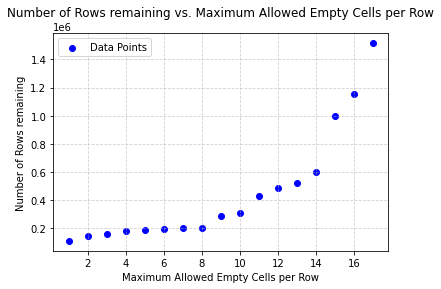

In [99]:
# clean dataframe
# Assuming 'df' is your large DataFrame
max_empty_cells = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  # Maximum number of allowed empty cells in a row
result = []
for max_empty in max_empty_cells:
    # Convert the DataFrame to a NumPy array for faster operations
    data_array = findata[all_sub_scores].values
    
    # Count the number of empty cells (missing values) per row
    empty_cells_count = np.isnan(data_array).sum(axis=1)
    
    # Filter rows where empty_cells_count is less than or equal to max_empty_cells
    filtered_rows = data_array[empty_cells_count <= max_empty]
    result.append(filtered_rows.shape[0])

# Scatter plot
plt.scatter(max_empty_cells, result, marker='o', color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Maximum Allowed Empty Cells per Row')
plt.ylabel('Number of Rows remaining')
plt.title('Number of Rows remaining vs. Maximum Allowed Empty Cells per Row')

# Customize the appearance
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()

the available data reduces the number of remaing observations more, the less missing values are allowed. The cell below shows the count for every single input to the scoring.

In [100]:
findata[all_sub_scores].describe().T

,count,mean,std,min,25%,50%,75%,max
rshf,314078.0,23.964551,91.327621,-998.28,3.78,14.68,33.26,999.91
rcem,309048.0,13.982361,50.715603,-994.40,3.14,9.80,20.41,996.54
rtas,330598.0,6.933014,14.813120,-100.00,1.13,5.36,12.21,100.00
prma,201741.0,4.413909,14.171638,-100.00,0.56,3.29,8.07,100.00
grma,13222.0,45.722033,31.717354,-99.71,20.62,36.73,70.98,100.00
etma,199641.0,8.621745,15.002078,-99.96,2.75,6.75,13.07,100.00
ebma,204574.0,4.286373,14.162493,-100.00,0.76,3.56,8.27,100.00
cfop,180721.0,7.515126,13.472768,-99.92,2.27,5.61,10.95,100.00
liqr,1005621.0,4.373981,9.522826,0.00,0.81,1.63,3.72,100.00
shlq,1512713.0,4.392710,22.633192,-99.99,0.30,1.06,3.09,999.13


#### Full Scoring Model with max. 4 missing values

In [118]:
# Assuming you have defined your DataFrame 'findata' and the list 'all_sub_scores'
# Create a mask to select only the columns in 'all_sub_scores'
column_mask_a = findata.columns.isin(all_sub_scores)
column_mask_b = findata.columns.isin(reduced_score)

# Count the number of missing values per row for selected columns
missing_values_count_a = findata.loc[:, column_mask_a].isnull().sum(axis=1)
missing_values_count_b = findata.loc[:, column_mask_b].isnull().sum(axis=1)

# Add the count of missing values as a new column to 'findata'
findata['Missing_Values_Count_a'] = missing_values_count_a
findata_clean_a = findata[findata.iloc[:, -1] <= 4]
findata['Missing_Values_Count_b'] = missing_values_count_b
findata_clean_b = findata[findata.iloc[:, -1] <= 1]


In [119]:
round(findata_clean_a.describe(),2)

,index,statusdate_year,dateinc_year,lastyear,numyears,updnum,pgsize,closdate_year,months,unit,...,solr,gear,ppe,tpe,sct,ace,sfpe,wcpe,tape,Missing_Values_Count_a
count,181134.00,2808.00,180407.00,181134.00,181134.00,181134.0,179869.00,181134.00,181134.00,181134.00,...,180943.00,164431.00,173562.00,175382.00,179685.00,174246.00,169553.00,168579.00,175297.00,181134.00
mean,120026.87,2020.50,1982.02,2020.58,9.29,3433.0,17522.06,2017.68,11.96,2.88,...,-40.17,-126.91,43.47,659.95,28.53,62.08,248.45,85.85,796.14,1.64
std,100626.57,9.81,35.46,0.62,1.78,0.0,25469.23,2.19,0.55,0.79,...,25.67,158.22,236.26,2416.66,20.53,37.66,661.19,309.05,3236.54,1.02
min,4.00,1900.00,1117.00,2016.00,1.00,3433.0,23.00,2014.00,1.00,0.00,...,-99.97,-999.33,-94.00,0.00,0.00,0.00,0.00,-94.00,0.00,0.00
25%,41916.25,2021.00,1974.00,2020.00,10.00,3433.0,1510.00,2016.00,12.00,3.00,...,-58.69,-155.23,1.00,132.00,12.25,43.00,26.00,6.00,89.00,1.00
50%,87950.50,2022.00,1993.00,2021.00,10.00,3433.0,4941.00,2018.00,12.00,3.00,...,-39.48,-71.20,9.00,242.00,23.46,57.00,66.00,29.00,174.00,1.00
75%,183265.75,2022.00,2003.00,2021.00,10.00,3433.0,26326.00,2020.00,12.00,3.00,...,-21.99,-29.58,28.00,498.00,40.26,72.00,172.00,70.00,425.00,2.00
max,499996.00,2023.00,2022.00,2022.00,10.00,3433.0,246071.00,2022.00,16.00,9.00,...,99.98,-0.00,8703.00,86574.00,100.00,956.00,9801.00,8873.00,96077.00,4.00


In [120]:
data = findata_clean_a[all_sub_scores + ['cntrycde', 'nat_prim_code', 'closdate_year']]

# Create a new DataFrame to store the weighted percentile ranks
weighted_percentile_ranks = pd.DataFrame()
    
# Calculate the percentile ranks for each sub-score
percentile_ranks = data.groupby(['cntrycde', 'nat_prim_code', 'closdate_year']).rank(pct=True, axis=0, method='max', na_option='keep')
percentile_ranks.fillna(0.5, inplace=True)

#Apply weights
weighted_ranks = percentile_ranks * np.array(all_weights)

# Add the Total_Score as a new column in the original DataFrame 'findata'
findata_clean_a['Total_Score'] = 0.2 * np.sum(weighted_ranks, axis=1)
findata_clean_a['Profitability_Score'] =      np.sum(weighted_ranks[performance_score_a], axis=1)
findata_clean_a['Margins_Score'] =            np.sum(weighted_ranks[performance_score_b], axis=1)
findata_clean_a['Bs_health_Score'] =          np.sum(weighted_ranks[performance_score_c], axis=1)
findata_clean_a['Wc_efficiency_Score'] =      np.sum(weighted_ranks[performance_score_d], axis=1)
findata_clean_a['Labor_Productivity_Score'] = np.sum(weighted_ranks[performance_score_e], axis=1)

data = findata_clean_b[reduced_score + ['cntrycde', 'nat_prim_code', 'closdate_year']]

# Create a new DataFrame to store the weighted percentile ranks
weighted_percentile_ranks = pd.DataFrame()
    
# Calculate the percentile ranks for each sub-score
percentile_ranks = data.groupby(['cntrycde', 'nat_prim_code', 'closdate_year']).rank(pct=True, axis=0, method='max', na_option='keep')
percentile_ranks.fillna(0.5, inplace=True)

#Apply weights
weighted_ranks = percentile_ranks * np.array(reduced_weight)

# Add the Total_Score as a new column in the original DataFrame 'findata'
findata_clean_b['Reduced_Score'] = np.sum(weighted_ranks, axis=1)


/var/folders/26/cxj_k_hn0rg1byqs0fj1std00000gn/T/ipykernel_18622/1486738327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findata_clean_a['Total_Score'] = 0.2 * np.sum(weighted_ranks, axis=1)
/var/folders/26/cxj_k_hn0rg1byqs0fj1std00000gn/T/ipykernel_18622/1486738327.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findata_clean_a['Profitability_Score'] =      np.sum(weighted_ranks[performance_score_a], axis=1)
/var/folders/26/cxj_k_hn0rg1byqs0fj1std00000gn/T/ipykernel_18622/1486738327.py:16: Set

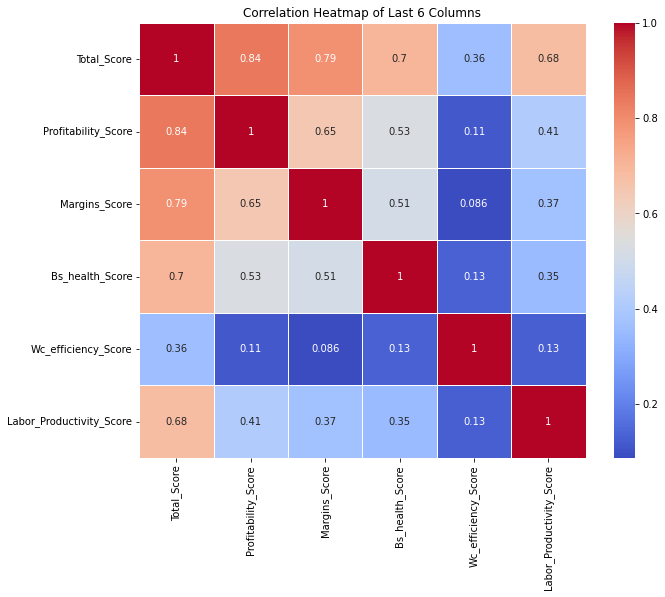

In [121]:
# Calculate the correlation matrix for the last 6 columns
correlation_matrix = findata_clean_a.iloc[:, -6:].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Last 6 Columns")
plt.show()

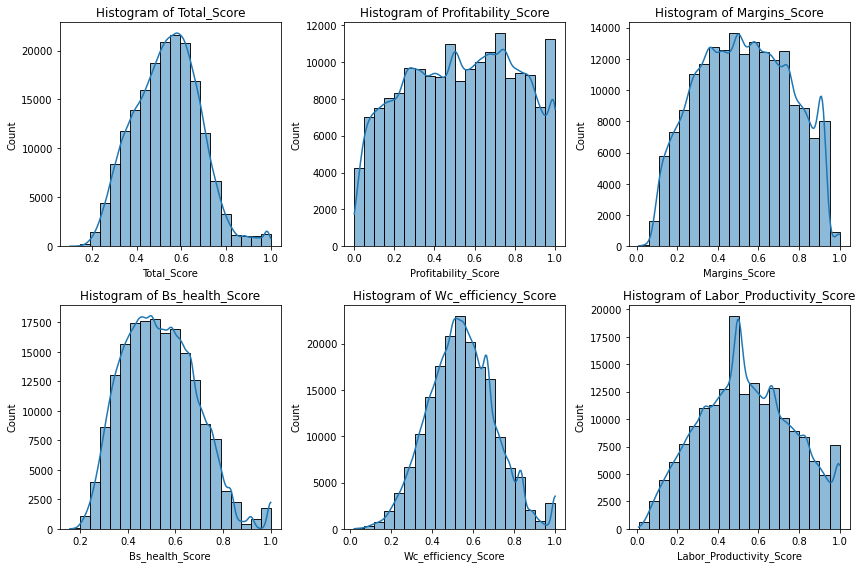

/Users/alexanderprinz/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


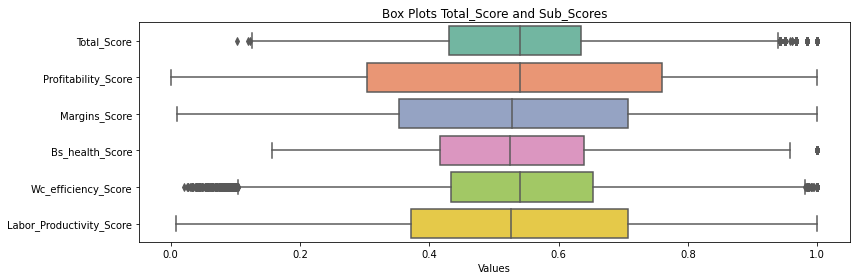

total observations: 181134


In [122]:
data = findata_clean_a.iloc[:, -6:]

# Create a 2x3 grid of histograms
plt.figure(figsize=(12, 8))

for i, column in enumerate(data.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

# Create a plot with 6 box plots
plt.figure(figsize=(12, 4))

sns.boxplot(data=data, orient='h', palette='Set2')
plt.title("Box Plots Total_Score and Sub_Scores")
plt.xlabel("Values")

plt.tight_layout()
plt.show()

print("total observations:", len(data))


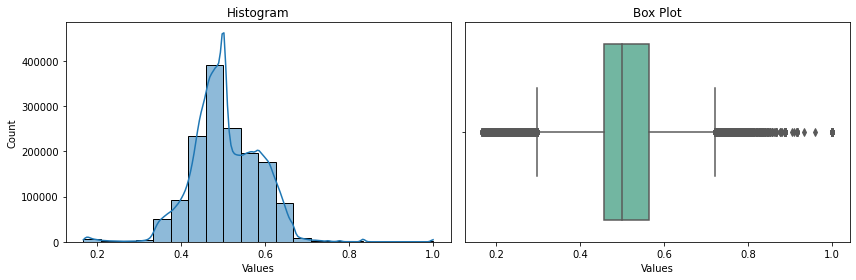

total observations: 1507873


In [123]:
data = findata_clean_b['Reduced_Score']


# Create a 1x2 grid
plt.figure(figsize=(12, 4))

# Plot histogram
plt.subplot(1, 2, 1)
sns.histplot(data, bins=20, kde=True)
plt.title('Histogram')
plt.xlabel('Values')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data, orient='h', palette='Set2')
plt.title('Box Plot')
plt.xlabel('Values')

plt.tight_layout()
plt.show()

print("total observations:", len(data))

In [12]:
reviews = pd.read_csv("reviews.csv")
unique_company_IDs_20K = reviews['company_uuid'].unique()